In [1]:
#Not implemented in project

'''
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

img = imread('pentagon.png')

print('image shape: ', img.shape)

plt.imshow(img)

plt.savefig("image.png", bbox_inches='tight')

plt.close()
'''

'\nimport matplotlib.pyplot as plt\nfrom matplotlib.pyplot import imread\n\nimg = imread(\'pentagon.png\')\n\nprint(\'image shape: \', img.shape)\n\nplt.imshow(img)\n\nplt.savefig("image.png", bbox_inches=\'tight\')\n\nplt.close()\n'

In [2]:
#plt.imshow(img)

In [3]:
#Not implemented in project

'''
import math
import numpy as np

img_shape = img.shape

x_max = img_shape[0]
y_max = img_shape[1]

theta_max = 1.0 * math.pi
theta_min = 0.0

r_min = 0.0
r_max = math.hypot(x_max, y_max)

r_dim = 200
theta_dim = 300

hough_space = np.zeros((r_dim,theta_dim))
'''

'\nimport math\nimport numpy as np\n\nimg_shape = img.shape\n\nx_max = img_shape[0]\ny_max = img_shape[1]\n\ntheta_max = 1.0 * math.pi\ntheta_min = 0.0\n\nr_min = 0.0\nr_max = math.hypot(x_max, y_max)\n\nr_dim = 200\ntheta_dim = 300\n\nhough_space = np.zeros((r_dim,theta_dim))\n'

To be continued:
https://www.science-emergence.com/Articles/Implementing-a-simple-python-code-to-detect-straight-lines-using-Hough-transform/

Trend lines will be calculated with mathematical methods.

In [4]:
import pandas as pd
from MetaTrader5 import *
MT5Initialize()
MT5WaitForTerminal()
from datetime import datetime as dt
eurusd_rates = MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_H4, dt(2019,3,31,0), dt(2019,4,7,0))
MT5Shutdown()
quotes = pd.DataFrame(list(eurusd_rates), columns=['Time','Open','High','Low','Close',
                                                   'Tick_Vol','Spread','Real_Vol']).set_index('Time')

In [5]:
import numpy as np
y = np.array(quotes[['Open', 'High', 'Low', 'Close']]).ravel()
print(y)

[1.12258 1.12309 1.12193 1.12278 1.12277 1.12348 1.12239 1.12336 1.12336
 1.12496 1.12271 1.12458 1.12455 1.12484 1.12267 1.12344 1.12344 1.12449
 1.12038 1.12059 1.12059 1.12133 1.12036 1.12117 1.12121 1.12121 1.11981
 1.12052 1.12052 1.12054 1.11954 1.1202  1.1202  1.1211  1.11898 1.11977
 1.11977 1.12117 1.11967 1.12052 1.12052 1.12075 1.11833 1.11965 1.11965
 1.12157 1.11915 1.12033 1.12037 1.12168 1.11995 1.1216  1.12159 1.12262
 1.12122 1.12225 1.12224 1.12446 1.12148 1.12429 1.12431 1.12543 1.12335
 1.12341 1.12339 1.12487 1.12247 1.12439 1.12439 1.12478 1.12311 1.12312
 1.12324 1.12472 1.12318 1.1244  1.1244  1.12451 1.12364 1.12406 1.12406
 1.12472 1.12302 1.12313 1.12313 1.12359 1.12122 1.12171 1.12171 1.12246
 1.12056 1.12188 1.12187 1.12265 1.1213  1.12191 1.122   1.12286 1.1217
 1.1222  1.12219 1.12278 1.12218 1.12265 1.12265 1.12361 1.12243 1.12296
 1.12296 1.12476 1.12165 1.12356 1.12357 1.12385 1.12096 1.12142 1.12142
 1.12185 1.12102 1.12152]


In [6]:
import matplotlib.dates as mdates
x = np.array(quotes.index).ravel()
print(x)
x = np.array([(lambda d: mdates.date2num(d))(d) for d in x for _ in (0,1,2,3)])
print(type(x))

['2019-04-01T03:00:00.000000000' '2019-04-01T07:00:00.000000000'
 '2019-04-01T11:00:00.000000000' '2019-04-01T15:00:00.000000000'
 '2019-04-01T19:00:00.000000000' '2019-04-01T23:00:00.000000000'
 '2019-04-02T03:00:00.000000000' '2019-04-02T07:00:00.000000000'
 '2019-04-02T11:00:00.000000000' '2019-04-02T15:00:00.000000000'
 '2019-04-02T19:00:00.000000000' '2019-04-02T23:00:00.000000000'
 '2019-04-03T03:00:00.000000000' '2019-04-03T07:00:00.000000000'
 '2019-04-03T11:00:00.000000000' '2019-04-03T15:00:00.000000000'
 '2019-04-03T19:00:00.000000000' '2019-04-03T23:00:00.000000000'
 '2019-04-04T03:00:00.000000000' '2019-04-04T07:00:00.000000000'
 '2019-04-04T11:00:00.000000000' '2019-04-04T15:00:00.000000000'
 '2019-04-04T19:00:00.000000000' '2019-04-04T23:00:00.000000000'
 '2019-04-05T03:00:00.000000000' '2019-04-05T07:00:00.000000000'
 '2019-04-05T11:00:00.000000000' '2019-04-05T15:00:00.000000000'
 '2019-04-05T19:00:00.000000000' '2019-04-05T23:00:00.000000000']
<class 'numpy.ndarray'>


From: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html
By examining the coefficients, we see that the line should have a gradient of roughly 1 and cut the y-axis at, more or less, -1.

We can rewrite the line equation as y = Ap, where A = [[x 1]] and p = [[m], [c]]. Now use lstsq to solve for p:

In [7]:
A = np.vstack([x, np.ones(len(x))]).T

In [8]:
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)
print(type(y))

0.00018893993325320117 -138.15529276992754
<class 'numpy.ndarray'>


In [9]:
import math
def dot(vA, vB):
    return vA[0]*vB[0]+vA[1]*vB[1]
def ang(lineA, lineB):
    # Get nicer vector form
    vA = [(lineA[0][0]-lineA[1][0]), (lineA[0][1]-lineA[1][1])]
    vB = [(lineB[0][0]-lineB[1][0]), (lineB[0][1]-lineB[1][1])]
    # Get dot prod
    dot_prod = dot(vA, vB)
    # Get magnitudes
    magA = dot(vA, vA)**0.5
    magB = dot(vB, vB)**0.5
    # Get cosine value
    cos_ = dot_prod/magA/magB
    # Get angle in radians and then convert to degrees
    angle = math.acos(dot_prod/magB/magA)
    # Basically doing angle <- angle mod 360
    ang_deg = math.degrees(angle)%360

    if ang_deg-180>=0:
        # As in if statement
        return 360 - ang_deg
    else: 

        return ang_deg

0.010825460662845201


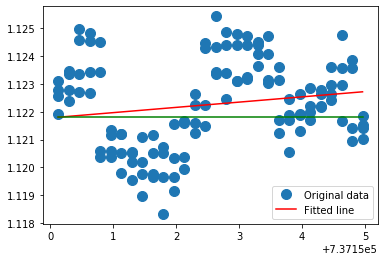

In [15]:
lineA = ((x[0],x[0]*m+c), (x[len(x)-1], x[len(x)-1]*m+c))
lineB = ((x[0],x[0]*m+c), (x[len(x)-1], x[0]*m+c))

print(ang(lineA, lineB))

import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, x*m+c, 'r', label='Fitted line')
plt.plot([x[0], x[len(x)-1]], [x[0]*m+c, x[0]*m+c], 'g')
plt.legend()
plt.show()

Code below will try function from https://kite.trade/forum/discussion/1047/a-simple-python-function-to-detect-support-resistance-levels

In [11]:
def supres(ltp, n):
    """
    This function takes a numpy array of last traded price
    and returns a list of support and resistance levels 
    respectively. n is the number of entries to be scanned.
    """
    from scipy.signal import savgol_filter as smooth

    #converting n to a nearest even number
    if n%2 != 0:
        n += 1
    
    n_ltp = ltp.shape[0]

    # smoothening the curve
    ltp_s = smooth(ltp, (n+1), 3) 

    #taking a simple derivative
    ltp_d = np.zeros(n_ltp)
    ltp_d[1:] = np.subtract(ltp_s[1:], ltp_s[:-1])
 
    resistance = []
    support = []
    
    for i in range(n_ltp - n):
        arr_sl = ltp_d[i:(i+n)]
        first = arr_sl[:int(n/2)] #first half
        last = arr_sl[int(n/2):] #second half
        
        r_1 = np.sum(first > 0)
        r_2 = np.sum(last < 0)

        s_1 = np.sum(first < 0)
        s_2 = np.sum(last > 0)

        #local maxima detection
        if (r_1 == (n/2)) and (r_2 == (n/2)): 
            resistance.append(ltp[i+(int(n/2)-1)])

        #local minima detection
        if (s_1 == (n/2)) and (s_2 == (n/2)): 
            support.append(ltp[i+(int(n/2)-1)])

    return support, resistance

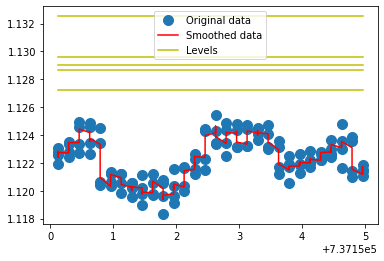

In [12]:
from scipy.signal import savgol_filter as smooth
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, smooth(y, 7, 3), 'r', label='Smoothed data')
plt.plot([min(x), max(x)], [1.12961, 1.12961], 'y', label='Levels')
plt.plot([min(x), max(x)], [1.12904, 1.12904], 'y')
plt.plot([min(x), max(x)], [1.13253, 1.13253], 'y')
plt.plot([min(x), max(x)], [1.12866, 1.12866], 'y')
plt.plot([min(x), max(x)], [1.12724, 1.12724], 'y')
plt.legend()
plt.show()

In [13]:
print(y)
print(x)

[1.12258 1.12309 1.12193 1.12278 1.12277 1.12348 1.12239 1.12336 1.12336
 1.12496 1.12271 1.12458 1.12455 1.12484 1.12267 1.12344 1.12344 1.12449
 1.12038 1.12059 1.12059 1.12133 1.12036 1.12117 1.12121 1.12121 1.11981
 1.12052 1.12052 1.12054 1.11954 1.1202  1.1202  1.1211  1.11898 1.11977
 1.11977 1.12117 1.11967 1.12052 1.12052 1.12075 1.11833 1.11965 1.11965
 1.12157 1.11915 1.12033 1.12037 1.12168 1.11995 1.1216  1.12159 1.12262
 1.12122 1.12225 1.12224 1.12446 1.12148 1.12429 1.12431 1.12543 1.12335
 1.12341 1.12339 1.12487 1.12247 1.12439 1.12439 1.12478 1.12311 1.12312
 1.12324 1.12472 1.12318 1.1244  1.1244  1.12451 1.12364 1.12406 1.12406
 1.12472 1.12302 1.12313 1.12313 1.12359 1.12122 1.12171 1.12171 1.12246
 1.12056 1.12188 1.12187 1.12265 1.1213  1.12191 1.122   1.12286 1.1217
 1.1222  1.12219 1.12278 1.12218 1.12265 1.12265 1.12361 1.12243 1.12296
 1.12296 1.12476 1.12165 1.12356 1.12357 1.12385 1.12096 1.12142 1.12142
 1.12185 1.12102 1.12152]
[737150.125      737150.12

In [14]:
print(supres(y,6))

([1.12059, 1.11833, 1.12324], [1.12117, 1.12052])


Code from https://kite.trade/forum/discussion/1047/a-simple-python-function-to-detect-support-resistance-levels don't know how to apply in project
I'll use np.linalg.lstsq method